In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [ ]:
df.duplicated().sum()

1177

In [ ]:
duplicated_row = df[df.duplicated()]
duplicated_row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,Legit,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,Legit,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,Legit,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,Legit,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,Legit,white
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,Legit,white
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,Legit,white
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,Legit,white


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [ ]:
df.quality.value_counts()

quality
Legit    5084
Fraud     236
Name: count, dtype: int64

Явный дисбаланс между целевой переменной, метрика Accuracy будет показывать завышенные результаты

Text(0.5, 1.0, 'Количествинный график подделки вин по категориям')

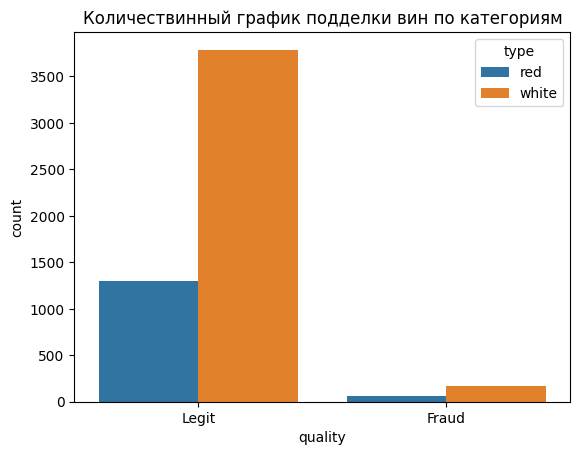

In [ ]:

sns.countplot(data = df, x = 'quality',hue = 'type')
plt.title('Количествинный график подделки вин по категориям')

Text(0.5, 1.0, 'Процент подделки красного вина')

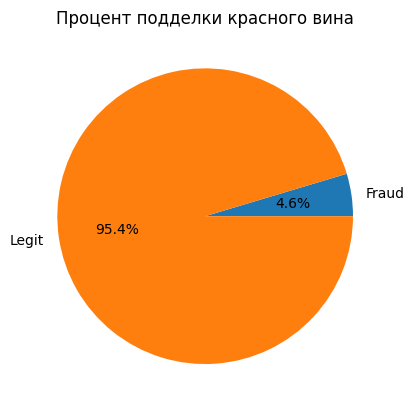

In [ ]:
df_group_red = df.loc[(df.type == 'red')].groupby('quality',as_index = False).agg('count')
df_group_white = df.loc[(df.type == 'white')].groupby('quality',as_index = False).agg('count')
# df_group_white
plt.pie(df_group_red.pH, labels = df_group_red['quality'],autopct='%.01f%%')
plt.title('Процент подделки красного вина')

Text(0.5, 1.0, 'Процент подделки белого вина')

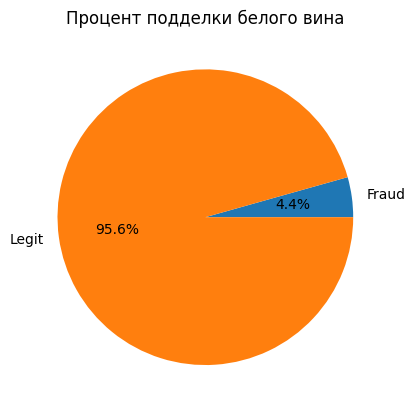

In [ ]:
plt.pie(df_group_white.pH, labels = df_group_white['quality'],autopct='%.01f%%')
plt.title('Процент подделки белого вина')

Вывод: Красные и белые вина подделыевают одинакого по данной выборке


Проверим данную гипотезу для гинеральной совокупности по методу Хи-квадрат                   
Н0: Частота подделок красного и белого вина статистически не значима             
H1: Частота подделок статичтически значима

In [ ]:
contingency_table = pd.crosstab(df['type'], df['quality'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print(f"Статистика хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Процент подделки вина зависит от типа вина.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Процент подделки вина не зависит от типа вина.")

Статистика хи-квадрат: 0.11
p-значение: 0.735
Не можем отвергнуть нулевую гипотезу. Процент подделки вина не зависит от типа вина.


In [ ]:
df_num = df.select_dtypes(['int','float'])
df_obj = df.select_dtypes('object')
df_obj

,quality,type
0,Legit,red
1,Legit,red
2,Legit,red
3,Legit,red
5,Legit,red
...,...,...
6492,Legit,white
6493,Legit,white
6494,Legit,white
6495,Legit,white


In [ ]:
df_obj = pd.get_dummies(df_obj,drop_first=True,dtype='int')
df_final = pd.concat([df_num,df_obj], axis = 1)
df_final

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Legit,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [ ]:
df_final.corr()['quality_Legit']

fixed acidity          -0.025957
volatile acidity       -0.160332
citric acid             0.067037
residual sugar          0.041803
chlorides              -0.034605
free sulfur dioxide     0.088387
total sulfur dioxide    0.037892
density                -0.028054
pH                     -0.018783
sulphates               0.037451
alcohol                 0.060721
quality_Legit           1.000000
type_white              0.005680
Name: quality_Legit, dtype: float64

<Axes: >

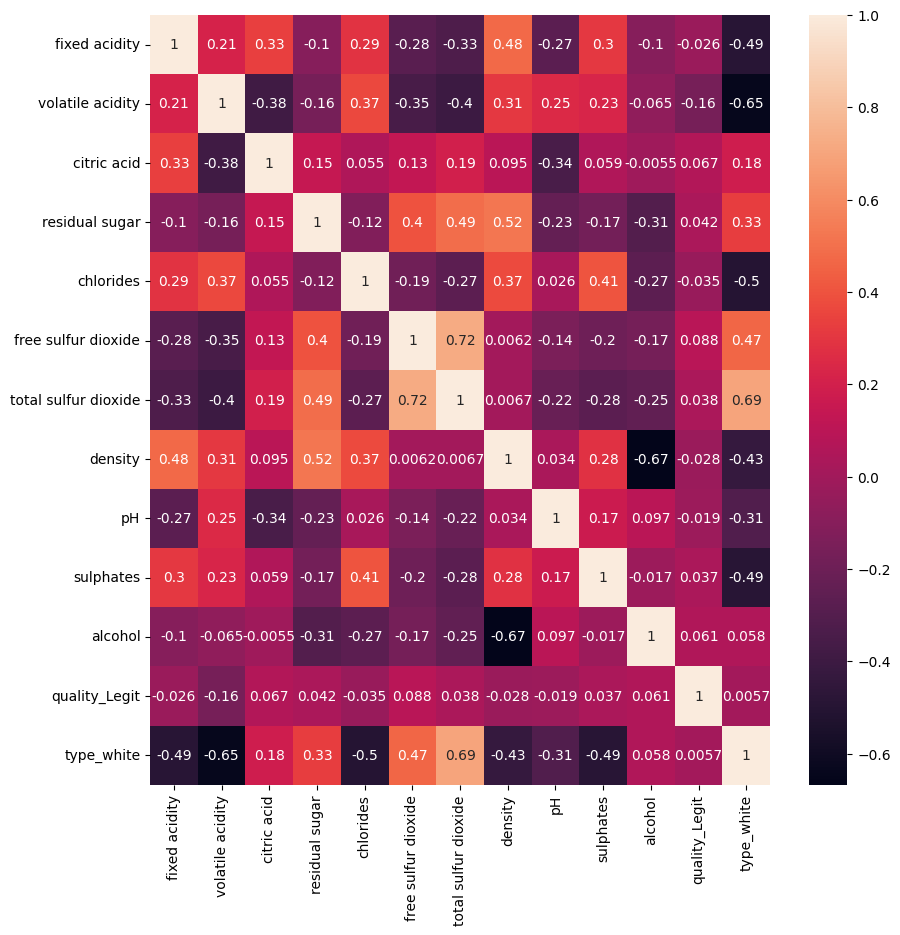

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df_final.corr(),annot=True)

# **Создадим модель**

In [ ]:
X = df_final.drop('quality_Legit',axis = 1)
y = df_final['quality_Legit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regressoin": LogisticRegression(solver='saga',multi_class="ovr",max_iter=10),
    "KNN": KNeighborsClassifier(),
    "Support Vector Class": SVC()
}

best_model = {
    'model': [],
    'f1_score': [],
    'r2_score': []
}

param_grid_log = {
    'penalty':['l1','l2','elasticnet'],
    'l1_ratio':np.linspace(0,1,20),
    'C':np.logspace(0, 4, 10)
}

param_grid_KNN = {
    'n_neighbors': list(range(1,20))

}

param_grid_SVC = {
    'C':np.linspace(0,1,10),
    'kernel':['linear','rbf']
}

for model_name, model in models.items():
    if model_name == "Logistic Regressoin":
      mod = model
      grid_model = GridSearchCV(mod,param_grid=param_grid_log)
      grid_model.fit(scaled_X_train,y_train)
      y_pred = grid_model.predict(scaled_X_test)
      best_model['model'].append(model_name)
      best_model['f1_score'].append(f1_score(y_test, y_pred))
      best_model['r2_score'].append(r2_score(y_test, y_pred))
    elif model_name == 'KNN':
      mod = model
      grid_model = GridSearchCV(mod,param_grid=param_grid_KNN,cv = 5)
      grid_model.fit(scaled_X_train,y_train)
      y_pred = grid_model.predict(scaled_X_test)
      best_model['model'].append(model_name)
      best_model['f1_score'].append(f1_score(y_test, y_pred))
      best_model['r2_score'].append(r2_score(y_test, y_pred))
    else:
      mod = model
      grid_model = GridSearchCV(mod,param_grid=param_grid_SVC)
      grid_model.fit(scaled_X_train,y_train)
      y_pred = grid_model.predict(scaled_X_test)
      best_model['model'].append(model_name)
      best_model['f1_score'].append(f1_score(y_test, y_pred))
      best_model['r2_score'].append(r2_score(y_test, y_pred))
param = pd.DataFrame(best_model)
param

Выходные данные были обрезаны до нескольких последних строк (5000).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/l

,model,f1_score,r2_score
0,Logistic Regressoin,0.977878,-0.030931
1,KNN,0.977878,-0.030931
2,Support Vector Class,0.977578,-0.045872
